# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create name for URL and then use request to pull data, json to print
humidity = []
temp = []
clouds = []
wind_speed = []
city_name = []
lon = []
lat = []

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key+"&q="+city
        response = requests.get(url).json()
        
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        
        print(f"Retriveing Data for {city}")
    except:
        print(f"Skipping {city}")

Retriveing Data for nemuro
Retriveing Data for upernavik
Retriveing Data for atar
Retriveing Data for henties bay
Retriveing Data for rikitea
Retriveing Data for port alfred
Retriveing Data for saint-philippe
Skipping olafsvik
Retriveing Data for hambantota
Retriveing Data for ushuaia
Retriveing Data for vaini
Retriveing Data for saskylakh
Retriveing Data for nuuk
Retriveing Data for port shepstone
Retriveing Data for provideniya
Retriveing Data for cape town
Retriveing Data for clyde river
Retriveing Data for harper
Retriveing Data for livingston
Retriveing Data for akdepe
Retriveing Data for port augusta
Retriveing Data for udachnyy
Retriveing Data for salinopolis
Retriveing Data for severo-kurilsk
Skipping bengkulu
Retriveing Data for kapaa
Retriveing Data for busselton
Retriveing Data for longyearbyen
Retriveing Data for nantucket
Retriveing Data for plouzane
Retriveing Data for lata
Retriveing Data for flinders
Retriveing Data for komsomolskiy
Retriveing Data for kavaratti
Retrive

Retriveing Data for aasiaat
Retriveing Data for ornskoldsvik
Retriveing Data for storforshei
Retriveing Data for corrente
Retriveing Data for roma
Retriveing Data for aldan
Retriveing Data for paredon
Skipping grao mogol
Retriveing Data for linjiang
Skipping uniao
Retriveing Data for viedma
Skipping halalo
Retriveing Data for tura
Retriveing Data for acapulco
Retriveing Data for coquimbo
Retriveing Data for talcahuano
Retriveing Data for richards bay
Retriveing Data for baykit
Retriveing Data for sorong
Retriveing Data for lavrentiya
Retriveing Data for arraial do cabo
Retriveing Data for kushima
Retriveing Data for fairbanks
Retriveing Data for kahului
Retriveing Data for karpathos
Retriveing Data for quartucciu
Retriveing Data for pueblo
Retriveing Data for kikwit
Retriveing Data for rawson
Skipping chagda
Retriveing Data for presidencia roque saenz pena
Retriveing Data for bonavista
Retriveing Data for simao
Retriveing Data for zhuhai
Retriveing Data for monroe
Retriveing Data for t

Retriveing Data for novyy urgal
Retriveing Data for marrakesh
Skipping bargal
Retriveing Data for lorengau
Retriveing Data for waynesville
Skipping lolua
Retriveing Data for esperance
Skipping loubomo
Retriveing Data for san jose
Retriveing Data for sechura
Retriveing Data for inongo
Retriveing Data for charters towers
Retriveing Data for touros
Retriveing Data for sabang
Retriveing Data for kayalpattinam
Retriveing Data for ayan
Retriveing Data for khandbari
Retriveing Data for gamba
Skipping mys shmidta
Retriveing Data for parati
Retriveing Data for evensk
Retriveing Data for gamboula
Retriveing Data for gallup
Retriveing Data for ziro
Retriveing Data for uvinza
Retriveing Data for humaita
Retriveing Data for jumla
Retriveing Data for basugaon
Retriveing Data for panguna
Retriveing Data for pueblo bello
Retriveing Data for avera
Retriveing Data for andilamena
Retriveing Data for manati
Retriveing Data for shingu
Skipping pravec
Retriveing Data for saint-raymond
Skipping krasnoselkup


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    'humidity':humidity,
    'temp':temp,
    'clouds':clouds,
    'wind_speed':wind_speed,
    'longitude':lon,
    'latitude':lat
}, index=[city_name])

weather_df.count()

humidity      574
temp          574
clouds        574
wind_speed    574
longitude     574
latitude      574
dtype: int64

In [5]:
weather_df.head()

,humidity,temp,clouds,wind_speed,longitude,latitude
Nemuro,82,48.83,100,12.82,145.57,43.32
Upernavik,83,33.21,54,6.51,-56.15,72.79
Atar,11,94.54,0,15.19,-13.05,20.52
Henties Bay,82,57.00,7,1.01,14.28,-22.12
Rikitea,82,75.33,100,17.16,-134.97,-23.12


In [6]:
weather_df.to_csv("WeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

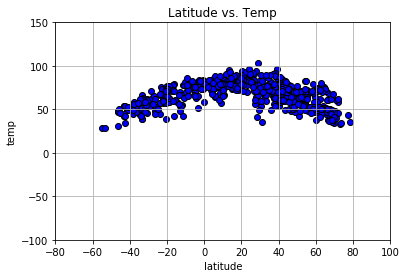

In [7]:
plt.scatter(weather_df["latitude"],weather_df["temp"], marker = "o",facecolors="blue",edgecolors="black")

plt.xlim(-80,100)
plt.ylim(-100,150)

plt.title("Latitude vs. Temp")
plt.xlabel("latitude")
plt.ylabel("temp")
plt.grid()
plt.savefig("Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

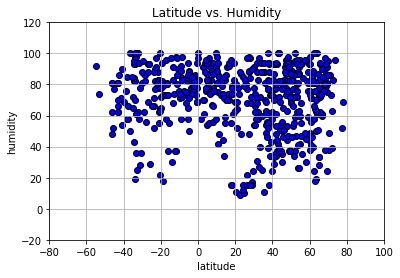

In [8]:
plt.scatter(weather_df["latitude"],weather_df["humidity"],marker = "o",facecolors="blue",edgecolors="black")

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.title("Latitude vs. Humidity")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.grid()
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

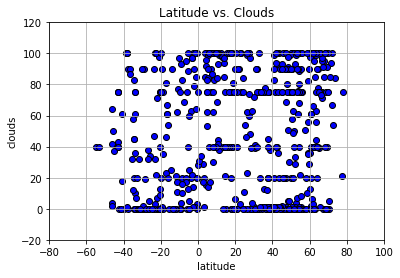

In [9]:
plt.scatter(weather_df["latitude"],weather_df["clouds"],marker = "o",facecolors="blue",edgecolors="black")

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.title("Latitude vs. Clouds")
plt.xlabel("latitude")
plt.ylabel("clouds")
plt.grid()
plt.savefig("Clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

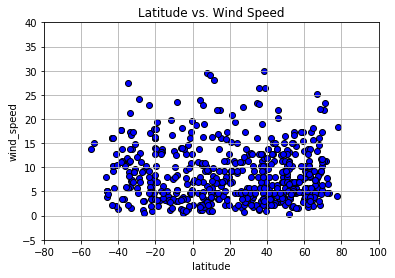

In [10]:
plt.scatter(weather_df["latitude"],weather_df["wind_speed"],marker = "o",facecolors="blue",edgecolors="black")

plt.xlim(-80,100)
plt.ylim(-5,40)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("latitude")
plt.ylabel("wind_speed")
plt.grid()
plt.savefig("Wind_Speed.png")
plt.show()